<h1>Descripcion</h1>

Data Exploration: Es sobre descubrir que es lo que nuestros datos significan estadisticamente y aplicar tecnicas de visualizacion, este paso ser realiza para obtener aspectos importantes del conjunto.

Univariado: Se enfoca en el analisis de los atributos uno a uno.

Bivariado: Analisa dos atributos en conjunto

Si quieres ir directamente a la teoria del arbol de decisiones Go to <a href=#bookmark>Aqui!</a>



In [1]:
#Importacion de librerias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Cargar los datos

data= pd.read_csv("golf-dataset.csv")

In [3]:
data

,Outlook,Temp,Humidity,Windy,Play Golf
0,Overcast,Cool,Normal,True,Yes
1,Overcast,Hot,High,False,Yes
2,Overcast,Hot,Normal,False,Yes
3,Overcast,Mild,High,True,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Rainy,Mild,High,False,Yes
7,Rainy,Mild,High,True,No
8,Rainy,Mild,Normal,False,Yes
9,Sunny,Cool,Normal,False,Yes


In [4]:
#Exploracion de variables para determinar que son, numericas o categoricas 
data.dtypes

Outlook      object
Temp         object
Humidity     object
Windy          bool
Play Golf    object
dtype: object

In [5]:
#Exploracion de variables para determinar si nos enfretamos con registros nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Outlook    14 non-null     object
 1   Temp       14 non-null     object
 2   Humidity   14 non-null     object
 3   Windy      14 non-null     bool  
 4   Play Golf  14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [6]:
#**Exploracion de variables para determinar si nos enfretamos Problemas atipicos y grandes desviaciones**
data.describe(include="all")

,Outlook,Temp,Humidity,Windy,Play Golf
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,Normal,False,Yes
freq,5,6,7,8,9


<h2>Analisis Univariado</h2>

Parte del analisis univariado incluye realizar tablas de frecuencia para observar que tan recurrentes son las categorias.

Como son atributos categoricos lo unico que podemos hacer es generar graficos pie o bar y tablas de frecuencia.

Para realizar la tabla, creo un nuevo dataframe llamado outlook, mediante el metodo group by que agrupa los datos creando un nuevo indice en este caso sera el atributo outlook, mediante agg creamos una nueva columna que almacena el conteo de los atributos.

In [7]:
outlook=data.groupby("Outlook").agg(Frecuencia=("Outlook","count"))
outlook["Frecuencia Acumulada"]= outlook["Frecuencia"].cumsum()
outlook["Frecuencia Relativa"]=outlook["Frecuencia"]/14
outlook

,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa
Outlook,,,
Overcast,4,4,0.285714
Rainy,5,9,0.357143
Sunny,5,14,0.357143


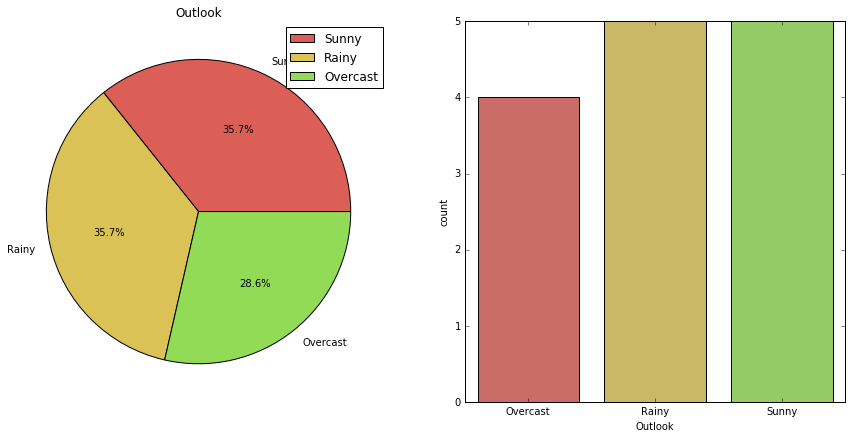

In [41]:
plt.subplots(figsize=(15,15))
sns.set_palette("hls", 8)
plt.subplot(2,2,1)
ax=data["Outlook"].value_counts().plot.pie(legend=True,autopct="%1.1f%%")
ax.set(title="Outlook",ylabel="")
plt.subplot(2,2,2)
sns.countplot(x=data["Outlook"])



In [48]:
temp = data.groupby("Temp").agg(Frecuencia=("Temp","count"))
temp["Frecuencia Absoluta"]= temp["Frecuencia"].cumsum()
temp["Frecuencia Relativa % "]=round((temp["Frecuencia"]/14)*100,2)
temp

,Frecuencia,Frecuencia Absoluta,Frecuencia Relativa %
Temp,,,
Cool,4,4,28.57
Hot,4,8,28.57
Mild,6,14,42.86


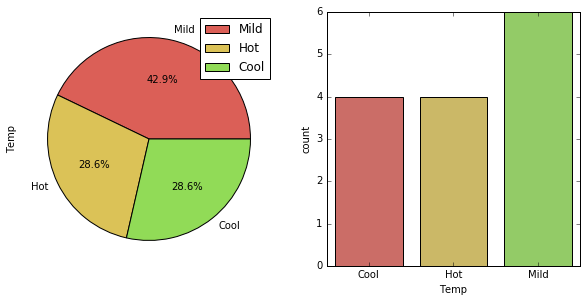

In [51]:
plt.subplots(figsize=(10,10))
plt.subplot(2,2,1) #Fila,columna, indice
data["Temp"].value_counts().plot.pie(legend=True,autopct="%1.1f%%")
plt.subplot(2,2,2)
sns.countplot(data["Temp"])

In [54]:
humidity = data.groupby("Humidity").agg(Frecuencia=("Humidity","count"))
humidity["Frecuencia Absotula"]=humidity["Frecuencia"].cumsum()
humidity["Frecuencia Relativa"]=round((humidity["Frecuencia"]/14)*100,2)
humidity

,Frecuencia,Frecuencia Absotula,Frecuencia Relativa
Humidity,,,
High,7,7,50.0
Normal,7,14,50.0


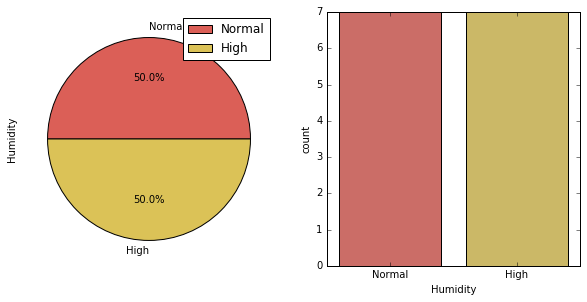

In [57]:
plt.subplots(figsize=(10,10))
plt.subplot(2,2,1) #Fila,columna, indice
data["Humidity"].value_counts().plot.pie(legend=True,autopct="%1.1f%%")
plt.subplot(2,2,2)
sns.countplot(data["Humidity"])

In [60]:
windy=data.groupby("Windy").agg(Frecuencia=("Windy","count"))
windy["Frecuencia Absoluta"]= windy["Frecuencia"].cumsum()
windy["Frecuencia Relativa"]=round((windy["Frecuencia"]/14)*100,2)
windy

,Frecuencia,Frecuencia Absoluta,Frecuencia Relativa
Windy,,,
False,8,8,57.14
True,6,14,42.86


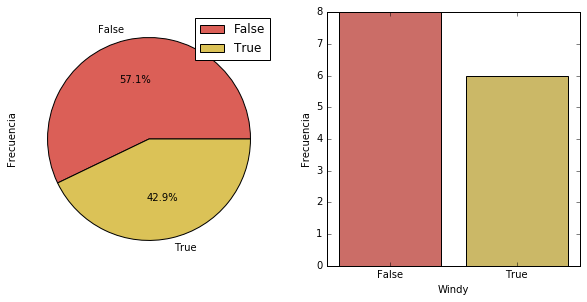

In [63]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
windy["Frecuencia"].plot.pie(legend=True,autopct="%1.1f%%")
plt.subplot(2,2,2)
sns.barplot(windy.index,windy["Frecuencia"])

<h2>Analisis Bivariado</h2>
Consiste en el analisis simultaneo de dos variables, explora el concepto de relacion entre las variables **(predictor vs target)**, Existen tres tipos de analisis Bivariado

1. Numerico & Numerico
2. Categorico & Categorico
3. Numerico & Categorico

En el caso de mi dataset es **categorico vs categorico**, lo que esta compuesto por graficos de barras y el test de chi cuadrado.

Para este tipo de analisis chi cuadrado se generan dos hipotesis:
<ul>
<li>hipotesis nula  : jugar o no jugar *No* depende del outlook/ wind / humidity/ temp</li>
<li>hipotesis alternativa  : jugar o no jugar depende del outlook/ wind / humidity/ temp</li>
</ul>




In [66]:
pd.crosstab(data["Outlook"],data["Play Golf"],margins=True)

Play Golf,No,Yes,All
Outlook,,,
Overcast,0,4,4
Rainy,2,3,5
Sunny,3,2,5
All,5,9,14


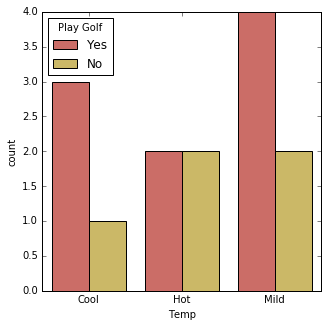

In [69]:
plt.figure(figsize=(5,5))
g = sns.countplot(x="Temp",data=data,hue="Play Golf")


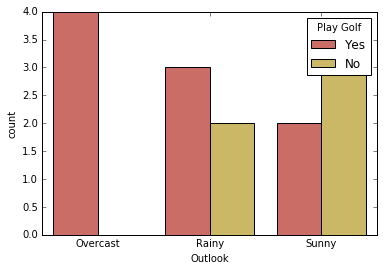

In [72]:
g = sns.countplot(x="Outlook",data=data,hue="Play Golf")

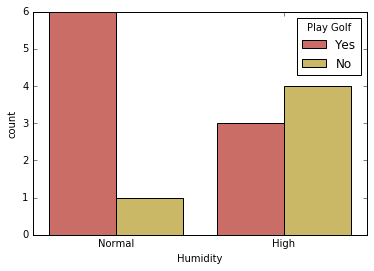

In [75]:
g = sns.countplot(x="Humidity",data=data,hue="Play Golf")

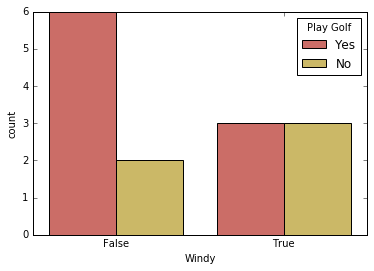

In [78]:
g = sns.countplot(x="Windy",data=data,hue="Play Golf")

<h2>Test de chi2 para determinar la asociacion entre los atributos(Categoria)</h2>

Manualmente chicuadrado se calcula con tres pasos:

1. Definir las hipotesis --> listo
2. Construir Tabla de Contingencia
3. Calcular valor de chi cuadrado

**Tabla de Contingencia**

La tabla de contingencia se construye con la siguiente formula

$E = n * P$

n: Cantidad de elementos en el subconjunto

P: Probabilidad

la tabla de contingencia se construye en base a la **tabla de observados** de la siguiente manera:

In [81]:
observado = pd.crosstab(data["Outlook"],data["Play Golf"],margins=True)
print(observado)

#e1 = 14*((observado["All"]["Overcast"]/14 )*(observado["Yes"]["All"]/14))




Play Golf  No  Yes  All
Outlook                
Overcast    0    4    4
Rainy       2    3    5
Sunny       3    2    5
All         5    9   14


**La tabla de contigencia se construye de la siguiente manera:**

<table>
	<caption>Tabla de contigencia</caption>
	<thead>
		<tr>
			<th style="background-color:#73dec1">Play Golf</th>
			<th style="background-color:#73dec1">No</th>
			<th style="background-color:#73dec1">Yes</th>
		</tr>
	</thead>
<tbody>
	<tr>
		<td style="background-color:#73dec1">Overcast</td>
		<td>E1 = 14 x p(overcast|no) = 14 * p(overcast)* p(no) = 14 * (4/14)* (5/14) = 1.42</td>
		<td>E2 = 14 x p(overcast|yes) = 14 * p(overcast)* p(yes) = 14 * (4/14)* (9/14) = 2.57</td>
	</tr>
	<tr>
		<td style="background-color:#73dec1">Rainy</td>
		<td>E3 = 14 x p(rainy|no) = 14 * p(rainy)* p(no) = 14 * (5/14)* (5/14) = 1.78</td>
		<td>E4 = 14 x p(rainy|yes) = 14 * p(rainy)* p(yes) = 14 * (5/14)* (9/14) = 3.12</td>
	</tr>
	<tr>
		<td style="background-color:#73dec1">Sunny</td>
		<td>E5 = 14 x p(sunny|no) = 14 * p(sunny)* p(no) = 14 * (5/14)* (5/14) = 1.78</td>
		<td>E6 = 14 x p(sunny|yes) = 14 * p(sunny)* p(no) = 14 * (5/14)* (9/14) = 3.12</td>
	</tr>
</tbody>
</table>

<h3>Calcular Chi cuadrado</h3>

$\sum{(E-O)**2/E}$

<ul>
<li>overcast|no = (0- E1)** 2/E1 = (0-1.42)** 2/1.42 = 2.86</li>
<li>overcast|yes = (4 - 2.57)**2/2.57= 5.25</li>
<li>rainy|no =(2-1.78)**2/1.78 = 0.086</li>
<li>rainy|yes=(3-3.12)**2/3.12 = 0.044</li>
<li>sunny|no=(3-1.78)**2/1.78=2.64</li>
<li>sunny|yes=(2-3.12)**2/3.12=3.91</li>
</ul>

$\sum{(E-O)**2/E}$ = 14.79


Teniendo en consideracion un alpha de 0.05 ; 

$df = (nºfilas-1)(nºcolumnas-1)$<br>

df=3-1 * 2-1 = 2

busco el valor en la tabla de chi cuadrado <a href="https://web.ma.utexas.edu/users/davis/375/popecol/tables/ chisq.html">Link Tabla</a>

chi=5.99

como el corte de la region es en el punto 5.99 el valor 14.79 cae fuera de la region de aceptacion de h0 entonces aceptamos la hiptesis alternativa que indica que existe relacion entre el target y outlook.


Scipy proporciona un metodo que realiza esto y es de la siguiente manera


In [84]:
from scipy.stats import chi2_contingency

observado = pd.crosstab(data["Outlook"],data["Play Golf"])
chi,pvalue,df,expected= chi2_contingency(observado)
print("Outlook vs Play Golf\n")
print("valor de chi cuadrado :",chi)
print("valor p o punto de corte:",pvalue)
print("grados de libertad:",df)
print("")
print("Tabla de contingencia\n",expected)

Outlook vs Play Golf

valor de chi cuadrado : 3.5466666666666664
valor p o punto de corte: 0.16976615743981122
grados de libertad: 2

Tabla de contingencia
 [[1.42857143 2.57142857]
 [1.78571429 3.21428571]
 [1.78571429 3.21428571]]


In [87]:
observado = pd.crosstab(data["Temp"],data["Play Golf"])
chi,pvalue,df,expected= chi2_contingency(observado)
print("Temp vs Play Golf\n")
print("valor de chi cuadrado :",chi)
print("valor p o punto de corte:",pvalue)
print("grados de libertad:",df)
print("")
print("Tabla de contingencia\n",expected)


Temp vs Play Golf

valor de chi cuadrado : 0.5703703703703703
valor p o punto de corte: 0.7518750053142591
grados de libertad: 2

Tabla de contingencia
 [[1.42857143 2.57142857]
 [1.42857143 2.57142857]
 [2.14285714 3.85714286]]


In [90]:
observado = pd.crosstab(data["Humidity"],data["Play Golf"])
chi,pvalue,df,expected= chi2_contingency(observado)
print("Humidity vs Play Golf\n")
print("valor de chi cuadrado :",chi)
print("valor p o punto de corte:",pvalue)

Humidity vs Play Golf

valor de chi cuadrado : 1.2444444444444445
valor p o punto de corte: 0.2646162170835855


In [93]:
observado = pd.crosstab(data["Windy"],data["Play Golf"])
chi,pvalue,df,expected= chi2_contingency(observado)
print("Windy vs Play Golf\n")
print("valor de chi cuadrado :",chi)
print("valor p o punto de corte:",pvalue)

Windy vs Play Golf

valor de chi cuadrado : 0.16203703703703703
valor p o punto de corte: 0.687287949348002


**Resumen**
<ul>
<li>Outlook vs Play Golf Se acepta la Hipotesis Alternativa</li>
<li>Temp vs Play Golf Se acepta la Hipotesis nula</li>
<li>Humidity vs Play Golf Se acepta la Hipotesis alternativa</li>
<li>Windy vs Play Gol Se acepta la Hipotesis nulaf</li>
</ul>

<a name="bookmark"></a>
 
<h2>Predecir el futuro</h2>

Esta parte lo que hace es predicir el futuro mediante el modelamiento, como el target es categorico entonces nos enfrentamos a un problema de clasificacion si el target hubiese sido numerico entonces seria regression

<h3>Arbol de decision</h3>

Los arboles de decision son modelos con estructura de arbol, el resultado final es un arbol con nodos de decision y nodos hoja.

Existen varios algoritmos que permiten la construccion de un arbol de decisiones yo ocupare ID3 que emplea dos principales formulas matematicas **Entropia** y **information gain**.

La entropia nos permite calcular la homogeneidad de la muestra, varia de o - 1, mientras mas cercano sea a 1 mas variado sera nuestro conjunto viceversa si es mas cercano a 0 sera mas homogeneo.

1. Entropia del target.

	E(y) = $\sum{(-P(Ci)* (log(P(Ci))/log 2)}$
2. Entropia de los predictores.

	E(Y,x) = $\sum{(P(Ci)* E(Ci)}$
	

In [96]:
#Entropia del target
#Tabla auxiliar
import math
golf=data.groupby("Play Golf").agg(Frecuencia=("Play Golf","count"))
golf

E_golf = 0
for i in golf["Frecuencia"]:
    E_golf=E_golf -i/14*math.log(i/14,2)

print("Entropia Y = ",round(E_golf,2))


#E_golf = -golf["Frecuencia"]/14*math.log(golf["Frecuencia"],2)

Entropia Y =  0.94


In [143]:
outlook=pd.crosstab(data["Outlook"],data["Play Golf"],margins=True)

#E_golf_outlook = -outlook["All"]/14 +(math.log(outlook["Yes"]/outlook["All"],2) + math.log(outlook["No"]/outlook["All"],2))
labels = set(list(data["Outlook"]))

def Entropia_pred(observados):
    E=0
    aux=0
    for i in labels:
        if observados["Yes"][i]== 0:
            a = 0
        else:
            a = math.log2(float(observados["Yes"][i]/observados["All"][i]))

        if observados["No"][i] == 0:
            b = 0
        else:
            b = math.log2(float(observados["No"][i]/observados["All"][i]))

        aux= (observados["All"][i]/14) *((-observados["Yes"][i]/observados["All"][i] )* a-(observados["No"][i]/observados["All"][i])* b)
        E=E+aux
    print("Entropia de Outlook",E)


Entropia_pred(outlook)



Entropia de Outlook 0.6935361388961918


In [102]:
temp=pd.crosstab(data["Temp"],data["Play Golf"],margins=True)
labels = set(list(data["Temp"]))
Entropia_pred(temp)

Entropia de Outlook 0.9110633930116763


In [105]:
hum=pd.crosstab(data["Humidity"],data["Play Golf"],margins=True)
labels = set(list(data["Humidity"]))
Entropia_pred(hum)


Entropia de Outlook 0.7884504573082896


In [108]:
wind=pd.crosstab(data["Windy"],data["Play Golf"],margins=True)
labels = set(list(data["Windy"]))
Entropia_pred(wind)


Entropia de Outlook 0.8921589282623617


Una vez calculadas las entropias se procede a calcular el gain <br>

$Information Gain(Y,x)=E(Y)-E(x)$
<ul>
    <li>gain(play golf, Outlook)= E(Play Golf) - E(Play Golf,Outlook) =  0.94 - 0.69 = 0.25</li>
	<li>gain(Play Golf,Temp) = 0.94 - 0.73 =0.21</li>
	<li>gain(Play Golf, Humidity) = 0.94 - 0.788 =0.15</li>
	<li>gain(Play Golf, Windy) = 0.94 - 0.89 =0.05</li>
</ul>

El gain mas alto corresponde al nodo raiz por ende sera Outlook, ahora filtramos la data por cada una de las categorias de outlook y las trabajamos a parte para encontrar el nodo que viene de la misma manera que lo habiamos hecho


In [111]:
filter =data[data["Outlook"]=="Sunny"]
temp=pd.crosstab(filter["Temp"],filter["Play Golf"],margins=True)

labels = set(list(data["Temp"]))
Entropia_pred(temp)

Entropia de Outlook 0.14285714285714285


In [114]:
hum=pd.crosstab(filter["Humidity"],filter["Play Golf"],margins=True)

labels = set(list(data["Humidity"]))
Entropia_pred(hum)


Entropia de Outlook 0.0


In [117]:
wind=pd.crosstab(filter["Windy"],filter["Play Golf"],margins=True)

labels = set(list(data["Windy"]))
Entropia_pred(wind)

Entropia de Outlook 0.3396348215831049


otra vez el gain para determinar que nodo se ubicara despues de outlook == Sunny <br>
gain(Play Gol outlook=Sunny,temp) =0.97 - 0.14 <br>
gain(Play Golf outlook=Sunny,Windy) = 0.97 - 0.33 <br>
**gain(Play Golf outlook=Sunny,Humidity) = 0.97 - 0 = 0.97**<br>

Entonces el ganador es Humidity

In [144]:
filtro =data[data["Outlook"]=="Rainy"]
temp=pd.crosstab(filtro["Temp"],filtro["Play Golf"],margins=True)

labels = set(list(filtro["Temp"]))
Entropia_pred(temp)

Entropia de Outlook 0.3396348215831049


In [145]:
filtro =data[data["Outlook"]=="Rainy"]
wind=pd.crosstab(filtro["Windy"],filtro["Play Golf"],margins=True)

labels = set(list(filtro["Windy"]))
Entropia_pred(wind)

Entropia de Outlook 0.0


Entonces calcular el gain seria:<br>

<ul>
<li>Gain(Play Golf Outlook ="Rainy", Temp) = 0.97 - 0.95</li>
<li>Gain(Play Golf Outlook ="Rainy", Windy) = 0.97 - 0</li>
</ul>

Dejamos como nodo Windy

In [126]:
outlook = pd.crosstab(data["Windy"],data["Play Golf"])
aux=[]
for i in outlook.values:
    aux.append(i[0] + i[1])
    
    

In [129]:
outlook["Frecuencia"] = aux
outlook

Play Golf,No,Yes,Frecuencia
Windy,,,
False,2,6,8
True,3,3,6
